# Reconhecimento de Dígitos
## 1. Importando bibliotecas

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importando função `dados_reduzidos` para dados reduzidos em outro arquivo

In [2]:
from processamento_de_dados.dados_reduzidos import dados_reduzidos

datasets = dados_reduzidos()

data_test_redu_df = datasets['data_test_redu_df']
data_train_redu_df = datasets['data_train_redu_df']

## 3. Classificação dos dígitos 1x5
### 3.1. Filtragem dos dados

In [3]:
data_test_redu_filtered_df = data_test_redu_df[(data_test_redu_df['label'] == 1) | (data_test_redu_df['label'] == 5)]
data_train_redu_filtered_df = data_train_redu_df[(data_train_redu_df['label'] == 1) | (data_train_redu_df['label'] == 5)]

## Train1x5
### 3.2.1. Plotagem de dados de **train1x5** 

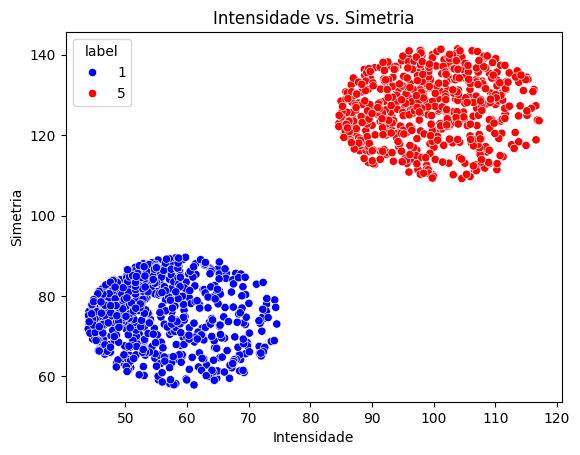

In [4]:
def plotagem_grafico_1x5(data_train_redu_filtered_df):
    sns.scatterplot(data_train_redu_filtered_df, x='intensidade', y='simetria', hue='label', palette={1: 'blue', 5: 'red'})
    plt.title('Intensidade vs. Simetria')
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')

plotagem_grafico_1x5(data_train_redu_filtered_df)

### 3.2.2. Preparação de `X` e `y` 

In [5]:
X_train = data_train_redu_filtered_df.iloc[:, 1:].values
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
        
y_train = data_train_redu_filtered_df.iloc[:, 0].values
y_train = np.where(y_train == 1, 1, -1)

### 3.2.3. Plotagem do modelo **Perceptron**

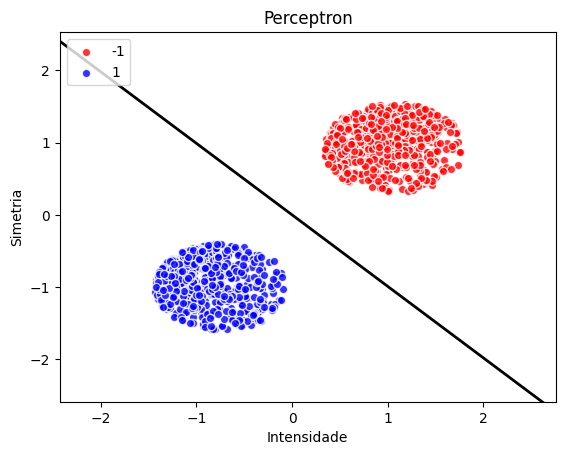

In [6]:
from modelos_lineares.perceptron import Perceptron

perceptron = Perceptron(taxa_aprendizado=0.01, n_iteracoes=1000)
perceptron.ajuste(X_train, y_train)
perceptron.plotar(X_train, y_train)

### 3.2.4. Plotagem do modelo **Regressão Linear**

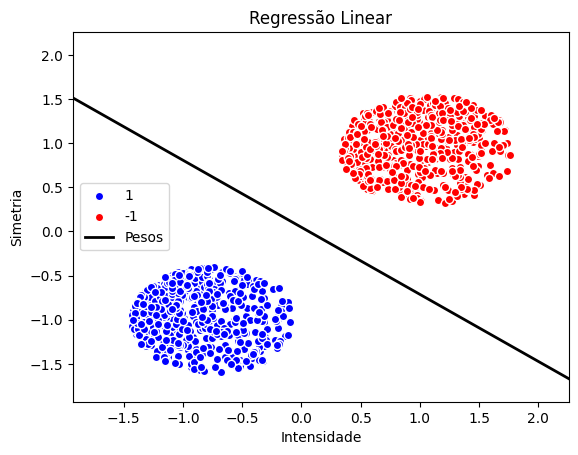

In [7]:
from modelos_lineares.regressao_linear import RegressaoLinear

regressao_linear = RegressaoLinear(taxa_aprendizado=0.01, n_iteracoes=10000)
regressao_linear.ajuste(X_train, y_train)   
regressao_linear.plotar(X_train, y_train)

### 3.2.5. Plotagem do modelo **Regressão Logística**

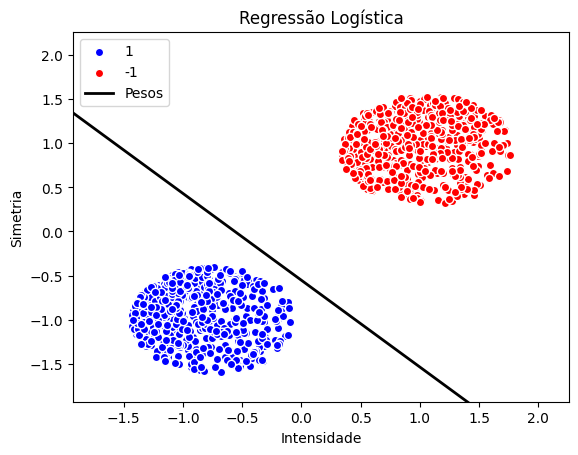

In [8]:
from modelos_lineares.regressao_logistica import RegressaoLogistica

regressao_logistica = RegressaoLogistica(taxa_aprendizado=0.001, n_iteracoes=1000)
regressao_logistica.ajuste(X_train, y_train) 
regressao_logistica.plotar(X_train, y_train)

## Test1x5
### 3.3.1. Plotagem de dados de **test1x5** 

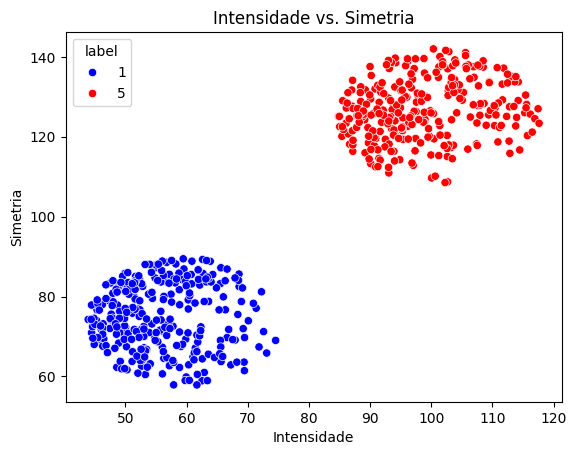

In [9]:
def plotagem_grafico_1x5(data_test_redu_filtered_df):
    sns.scatterplot(data_test_redu_filtered_df, x='intensidade', y='simetria', hue='label', palette={1: 'blue', 5: 'red'})
    plt.title('Intensidade vs. Simetria')
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')

plotagem_grafico_1x5(data_test_redu_filtered_df)

### 3.3.2. Preparação de `X` e `y`

In [10]:
X_test = data_test_redu_filtered_df.iloc[:, 1:].values
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
        
y_test = data_test_redu_filtered_df.iloc[:, 0].values
y_test = np.where(y_test == 1, 1, -1)

### Declaração de funções para gerar a `matriz de confusão` e o `relatório de classificação`

## Gerando a matriz de confusão e relatório de classificação para o **Perceptron**, **Regressão Linear** e **Regressão Logística** com os dados de teste

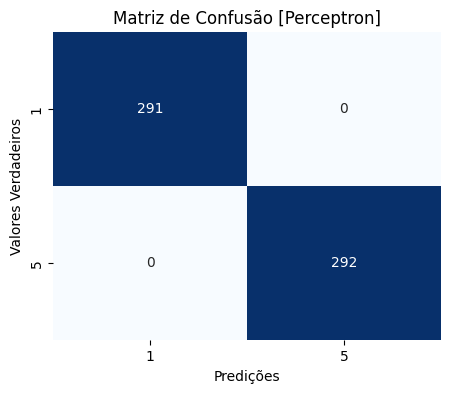

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       291
           5       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



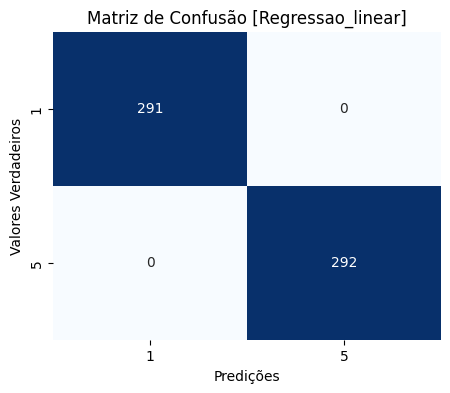

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       291
           5       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



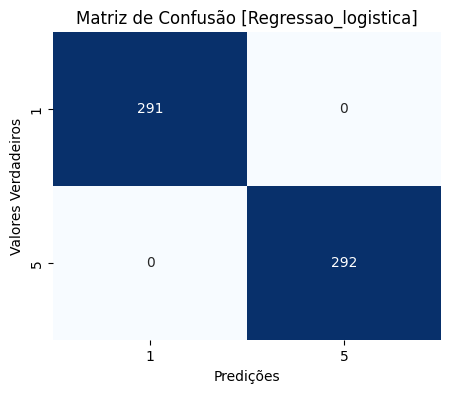

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       291
           5       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



In [11]:
from utils.nomes_modelos import nomes_modelos
from processamento_de_dados.gerar_matriz_de_confusao import gerar_matriz_de_confusao
from processamento_de_dados.gerar_relatorio_de_classificacao import gerar_relatorio_classificacao

for index, modelo in enumerate((perceptron, regressao_linear, regressao_logistica)):
    modelo.ajuste(X_test, y_test)
    y_previsao = modelo.prever(X_test)

    gerar_matriz_de_confusao(y_test, y_previsao, classes=['1', '5'], modelo=nomes_modelos[index])
    gerar_relatorio_classificacao(y_test, y_previsao, classes=['1', '5'])